In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading data
ausdata = pd.read_csv("FAOSTAT_data_2-28-2022.csv")
ausdata.head(3)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,10,Australia,6125,Value,21032,Political stability and absence of violence/te...,2000,2000,index,1.33,X,International reliable sources,NaN
1,FS,Suite of Food Security Indicators,10,Australia,6125,Value,21032,Political stability and absence of violence/te...,2002,2002,index,1.19,X,International reliable sources,NaN
2,FS,Suite of Food Security Indicators,10,Australia,6125,Value,21032,Political stability and absence of violence/te...,2003,2003,index,0.88,X,International reliable sources,NaN


# Exploratory Data Analysis(EDA)

In [4]:
#shape
ausdata.shape

(19, 15)

In [5]:
#datastructures
ausdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       19 non-null     object 
 1   Domain            19 non-null     object 
 2   Area Code         19 non-null     int64  
 3   Area              19 non-null     object 
 4   Element Code      19 non-null     int64  
 5   Element           19 non-null     object 
 6   Item Code         19 non-null     int64  
 7   Item              19 non-null     object 
 8   Year Code         19 non-null     int64  
 9   Year              19 non-null     int64  
 10  Unit              19 non-null     object 
 11  Value             19 non-null     float64
 12  Flag              19 non-null     object 
 13  Flag Description  19 non-null     object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 2.4+ KB


In [6]:
#check missing values
ausdata.isnull().sum()

Domain Code          0
Domain               0
Area Code            0
Area                 0
Element Code         0
Element              0
Item Code            0
Item                 0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag                 0
Flag Description     0
Note                19
dtype: int64

In [9]:
#Dropping few columns and make a new dataset 
# note: rows= 0-axis  , Columns= 1-axis
ausdata.drop(["Note","Year Code"], axis=1,inplace=True)

In [10]:
#summary statistics
ausdata.describe()

,Area Code,Element Code,Item Code,Year,Value
count,19.0,19.0,19.0,19.000000,19.000000
mean,10.0,6125.0,21032.0,2009.947368,0.985263
std,0.0,0.0,0.0,5.720079,0.119088
min,10.0,6125.0,21032.0,2000.000000,0.860000
25%,10.0,6125.0,21032.0,2005.500000,0.890000
50%,10.0,6125.0,21032.0,2010.000000,0.940000
75%,10.0,6125.0,21032.0,2014.500000,1.030000
max,10.0,6125.0,21032.0,2019.000000,1.330000


In [11]:
#groupby
ausdata.groupby(["Year","Value"]).mean()

,,Area Code,Element Code,Item Code
Year,Value,,,
2000,1.33,10.0,6125.0,21032.0
2002,1.19,10.0,6125.0,21032.0
2003,0.88,10.0,6125.0,21032.0
2004,0.94,10.0,6125.0,21032.0
2005,0.89,10.0,6125.0,21032.0
2006,0.94,10.0,6125.0,21032.0
2007,0.93,10.0,6125.0,21032.0
2008,0.96,10.0,6125.0,21032.0
2009,0.86,10.0,6125.0,21032.0


# Visualization

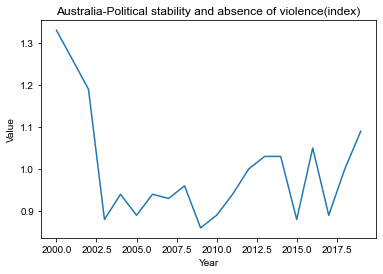

<Figure size 288x216 with 0 Axes>

In [12]:
#line plot using seaborn library
sns.lineplot(x="Year",y="Value", data=ausdata)
plt.title("Australia-Political stability and absence of violence(index)")
sns.set_style(style=None, rc =None)
sns.set_style("darkgrid")
plt.figure(figsize=(4,3))
plt.show()


Text(0.5, 1.0, 'Australia-Political stability and absence of violence(index)')

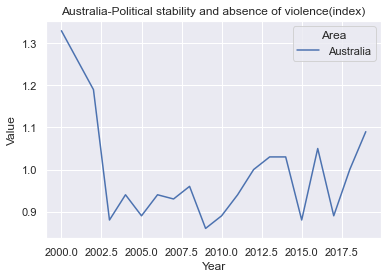

In [13]:
# Plot the responses for different events and regions
sns.set_theme(style="darkgrid")
sns.lineplot(x="Year", y="Value",
             hue="Area",
             data=ausdata)
plt.title("Australia-Political stability and absence of violence(index)")             

In [17]:
#lineplot using plotly 
#import plotly
import plotly.express as px
#adding data
fig = px.line(ausdata, x = 'Year', y = 'Value', title='Australia-Political stability and absence of violence(index)')
fig.show()